# 线性回归（一）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:purple">0) 介绍一些可能用到的numpy库的函数。</span>

In [2]:
#一些可能用到的numpy库的函数

#创建numpy矩阵
A = np.array([[1, 2, 3],[4, 5, 6]]) #创建矩阵
B = np.ones((3, 2)) #创建全1矩阵
C = np.zeros((3, 2)) #创建全0矩阵
print('A:\n',A,'\n')
print('B:\n',B,'\n')
print('C:\n',C,'\n')

A:
 [[1 2 3]
 [4 5 6]] 

B:
 [[1. 1.]
 [1. 1.]
 [1. 1.]] 

C:
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 



In [3]:
#提取矩阵的某几行和某几列
D = np.array([[1, 0, 0, 0],[0, 2, 0, 0],[0, 0, 3, 0],[0, 0, 0, 4]])
print('D:\n',D,'\n')
print(D[0:2, 1:3],'\n') #提取矩阵的0-1行、1-2列的元素，返回一个2×2的矩阵
print(D[:, 2:3],'\n') #提取第2列上的所有元素，返回一个4×1的矩阵

D:
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]] 

[[0 0]
 [2 0]] 

[[0]
 [0]
 [3]
 [0]] 



In [4]:
#矩阵的转置
E = np.array([[3,2,1],[6,8,3]])
print('E:\n',E,'\n')
print('The transpose of E:\n',E.T,'\n')

E:
 [[3 2 1]
 [6 8 3]] 

The transpose of E:
 [[3 6]
 [2 8]
 [1 3]] 



In [5]:
#矩阵的加/减/星乘(要求两个矩阵的行数相同、列数也相同)
F = np.array([[0,1,1],[4,2,3]])
G = np.array([[0,8,1],[4,4,4]])
print('F:\n',F,'\n')
print('G:\n',G,'\n')
print('F + G:\n',F + G,'\n')
print('F - G:\n',F - G,'\n')
print('F * G:\n',F * G,'\n') #对应位置相乘

F:
 [[0 1 1]
 [4 2 3]] 

G:
 [[0 8 1]
 [4 4 4]] 

F + G:
 [[0 9 2]
 [8 6 7]] 

F - G:
 [[ 0 -7  0]
 [ 0 -2 -1]] 

F * G:
 [[ 0  8  1]
 [16  8 12]] 



In [6]:
#矩阵点乘(注意前一个矩阵的列数要等于后一个矩阵的行数才能进行点乘)
H = np.array([[2,1,1],[9,2,3]])
I = np.array([[0,8],[4,4],[5,5]])
print('H:\n',H,'\n')
print('I:\n',I,'\n')
print('H.dot(I):\n',H.dot(I),'\n')


H:
 [[2 1 1]
 [9 2 3]] 

I:
 [[0 8]
 [4 4]
 [5 5]] 

H.dot(I):
 [[ 9 25]
 [23 95]] 



In [ ]:
#矩阵(非奇异方阵)的求逆
J = np.array([[1, 0, 0],[0, 2, 0],[0, 0, 3]])
print('J:\n',J,'\n')
print('The inverse of J:\n',np.linalg.inv(J),'\n')


In [ ]:
#矩阵的拼接
K = np.array([[1, 2, 3], [4, 5, 6]])
L = np.array([[7, 8, 9], [10, 11, 12]])
print('K:\n',K,'\n')
print('L:\n',L,'\n')
print('\n',np.r_[K, L],'\n') #上下拼接
print('\n',np.c_[K, L],'\n') #左右拼接

In [ ]:
#矩阵的求和
M = np.array([[5,0,2],[3,5,8]])
print('M:\n',M,'\n')
print('The sum of M:\n',np.sum(M),'\n')

<span style="color:purple">1) 使用pandas库的read_csv()函数(可以参考[pandas的官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))将训练数据集'train.csv'和测试数据集'test.csv'载入到Dataframe对象中。</span>

In [ ]:
# Your code here

#读取数据集
#train_frame = pd.read_csv('train.csv')
#test_frame = pd.read_csv('test.csv')

#转化成numpy矩阵
#train = np.array(train_frame)
#test = np.array(test_frame)



<span style="color:purple">2) 假设模型为一元线性回归模型$\hat{y}=wx+b$, 损失函数为$l(w,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$, 其中$\hat{y}^{(i)}$表示第$i$个样本的预测值，$y^{(i)}$表示第$i$个样本的实际标签值, $m$为训练集中样本的个数。求出使得损失函数最小化的参数$w$和$b$。</span>

方法① 

将$l(w,b)$分别对$w$和$b$求导，得到
$$
\frac{\partial l(w,b)}{\partial w}=w\sum_{i=1}^m x_i^2 -\sum_{i=1}^m (y_i-b)x_i,
$$
$$
\frac{\partial l(w,b)}{\partial b}=mb -\sum_{i=1}^m (y_i-wx_i),
$$
令上述两式为零即可得到$w$和$b$的解析解：
$$
w=\frac{\sum_{i=1}^m y_i (x_i-\bar{x})}{\sum_{i=1}^m x_i^2-\frac{1}{m}(\sum_{i=1}^m x_i)^2},
$$
$$
b=\frac{1}{m}\sum_{i=1}^m(y_i-wx_i),
$$
其中$\bar{x}=\frac{1}{m}\sum_{i=1}^m x_i$为$x$的均值。



In [5]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#读取数据集
train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')

#转化成numpy矩阵
train = np.array(train_frame)   #训练集
test = np.array(test_frame)        #测试集
#print("train:\n",train,'\n')
#print("test:\n",test,'\n')
temp=0             #初始化变量
n=0
for x in train[:,0]:
    temp=temp+x    #将train中所有的X值求和
    n=n+1          #累加获得train数据集中的数据组数
x_ever=temp/n      #x的平均值
print("x_ever:",x_ever,'\n')
#
#初始化
w_up=0;            #用来记录w的解析解分子上的连加结果
w_down_1=0         #用来记录w的解析解分母上左边的连加结果
w_down_2=0         #用来记录w的解析解分母上右边的连加结果
j=0
#
#在循环中进行计算
for x in train[:,0]:
    y=train[j,1]
    j=j+1   #通过j的自增保证下一次循环中y的值与x的值同步对应
    w_up=y*(x-x_ever)+w_up   
    w_down_1=x*x+w_down_1
    w_down_2=x+w_down_2
# 将w_up，w_down_1，w_down_2数据结合到一起获得w的值
w=w_up/(w_down_1-(w_down_2*w_down_2)/(1+j))
print("w:",w,'\n')

#计算b
mb=0
p=0
for x in train[:,0]:
    y=train[p,1]
    p=p+1
    mb=mb+y-w*x
b=mb/p             #计算平均值即为b
print("b:",b,'\n')


x_ever: 1.4742879639614397 

w: 2.9884070446594273 

b: 4.98431681257423 



MSE 0.16679446145959484


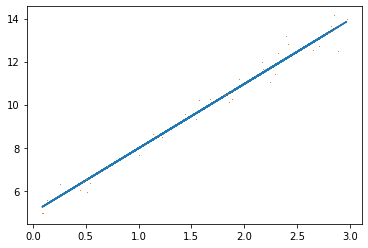

In [7]:
test_frame = pd.read_csv('test.csv') #导入测试集数据
test=np.array(test_frame)            #测试集数据转化为矩阵
x=test[:,0]                          #获取测试集x值的列表
y2=test[:,1]                         #获取测试集y值的列表
y1=[]
mse=0
i=0
for mx in x:
    y=mx*w+b
    mse=mse+(y-y2[i])*(y-y2[i])
    y1.append(y)     #将每一个计算得到的预测值放入列表y1中
    i=i+1
MSE=mse/(i+1)
print("MSE",MSE)
plt.plot(x,y1)       #绘制线性预测图
plt.plot(x,y2,',')   #做出测试集数据的散点图

方法② 梯度下降法。(暂时不用实现)

方法③ 

用矩阵表示，假设数据集有$m$个样本，特征有$n$维$。X=\left[ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1n} & 1 \\
                         x_{21} & x_{22} & \cdots & x_{2n} & 1 \\
                         \vdots & \vdots &      & \vdots & \vdots \\
                         x_{m1} & x_{m2} & \cdots & x_{mn} & 1 \end{matrix} \right]$,
        实际标签$Y=\left[ \begin{matrix} y_{1} \\
                         y_{2} \\
                         \vdots \\
                         y_{m}\end{matrix} \right]$,
        参数$B=\left[ \begin{matrix} w_{1} \\
                         w_{2} \\
                         \vdots \\
                         w_{n} \\
                         b\end{matrix} \right]$，则解析解为$B^*=(X^T X)^{-1}X^T Y$。推导过程可参考[这篇文章](https://zhuanlan.zhihu.com/p/74157986)。

In [3]:
# Your code here
#将train矩阵变为X矩阵
train_frame = pd.read_csv('train.csv')
Train=np.array(train_frame)
i=0;
for y in Train[:,1]:
    Train[i,1]=1
    i=i+1
#获取Train矩阵的转置矩阵
Train_T=Train.T
T_t=Train_T.dot(Train) #矩阵与矩阵点乘之后的结果
T_t1=np.linalg.inv(T_t)  #T_t矩阵的求逆过程
train_w = np.array(train_frame)
Tag_y=train_w[:,1]     #标签Y矩阵
M=T_t1.dot(Train_T)
B=M.dot(Tag_y)
print("B:\n",B)



B:
 [3.04147887 4.90607366]


<span style="color:purple">3) 使用求解出来的线性回归模型对测试数据集'test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像）。</span>

MSE 0.1661152066070563


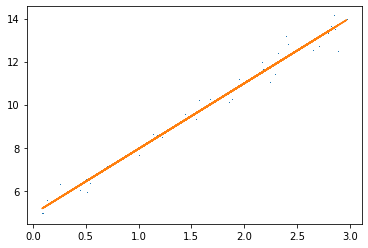

In [4]:
# Your code here
#A=np.array([[1,2,3],[4,5,6],[7,8,9]])
#x = A[0, :] #从一个矩阵中提取出一行作为一个向量
#y1 = np.array([2, 3, 5])
#plt.plot(x, y1) #画出折线图
#y2 = np.array([2.5, 2.8, 5.3])
#plt.plot(x, y2, '.') #画出散点图
#plt.show()
test_frame = pd.read_csv('test.csv') #导入测试集数据
test=np.array(test_frame)            #测试集数据转化为矩阵
x=test[:,0]                          #获取测试集x值的列表
y2=test[:,1]                         #获取测试集y值的列表
y1=[]
plt.plot(x, y2,',')
i=0
mse=0
for k in x:
    y=B[0]*k+B[1]
    y1.append(y) #将每一个计算得到的预测值放入列表y1中
    mse=mse+(y-y2[i])*(y-y2[i])
    i=i+1
MSE=mse/(i+1)
plt.plot(x,y1)
print("MSE",MSE)

<span style="color:purple">4) 在训练数据集'train2.csv'上求一个三元线性回归模型$\hat{y}=w_1 x_1 + w_2 x_2 + w_3 x_3 + b$的使得损失函数$l(w_1,w_2,w_3,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$最小的参数$w_1,w_2,w_3$以及$b$。并在测试数据集'test2.csv'上进行预测，输出预测结果的均方误差$MSE(\hat{y},y)=\frac{1}{n}\sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2$, $n$为测试集中样本个数。</span>

方法① 同2)中的方法③。

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_frame = pd.read_csv('train2.csv')
#转化成numpy矩阵
Train2= np.array(train_frame)   #训练集
test_frame=pd.read_csv('test2.csv')
test2=np.array(test_frame)

#获取x的向量
x1=test2[:,0]
x2=test2[:,1]
x3=test2[:,2]
# print(Tag_y2)
# print(Train2)
i=0
for x in Train2:
    Train2[i,3]=1
    i=i+1
# print(Train2,end="\n\n\n\n")

#获取Train矩阵的转置矩阵
Train2_T=Train2.T

T2_t=Train2_T.dot(Train2) #矩阵与矩阵点乘之后的结果
T2_t1=np.linalg.inv(T2_t)  #T_t矩阵的求逆过程
# print(T2_t1)

M=T2_t1.dot(Train2_T)


my_train=pd.read_csv('train2.csv')
My_train=np.array(my_train)
Tag_yy=My_train[:,3]


my_B=M.dot(Tag_yy)
print(my_B)

# print(Tag_yy)
y1=[]
#计算预测值
# print(x1,end="\n\n\n")
# print(x2,end="\n\n\n")
# print(x3,end="\n\n\n")
for j in range(0,40,1):
    a=my_B[0]*x1[j]
    b=my_B[1]*x2[j]
    c=my_B[2]*x3[j]
    y=a+b+c+my_B[3]  #计算Y的预测值
    y1.append(y)     
y2=test2[:,3]        #获取Y的真实值
# print(y1,"\n\n\n",y2)
sum=0
for g in range(len(test2)):
    sum=sum+(y1[g]-y2[g])*(y1[g]-y2[g])
MSE=sum/40
print("MSE:",MSE)
# print(y1)
# plt.plot(x1,x2,x3,y1)

[1.00723001 2.00339371 3.01025624 5.94254393]
MSE: 0.16537691128951554
